<h1 style="text-align: center;">Introduction to Data Science - Assignment 6</h1>
<h3 style="text-align: center;">Name: Hugo Hayashi</h3>
<h3 style="text-align: center;">Student ID: 22446441</h3>



## Question 1


- Probability of A winning: 100 / 1000 = 0.1
- Probability of B winning: 99 / 100 * 0.9 + 100 / 999 * (1-0.1) = 0.1
- Probability of both winning: (Probability of A winning) * (Probability of B winning given A wins) = 0.1 * 99 / 999 = 0.0099

In [9]:
# Your fancy code here
import numpy as np
import random
import math

class Lottery:
    """Lottery box with 1000 tickets and 100 winners"""

    def __init__(self):
        self.tickets = [0] * 900 + [1] * 100
    
    def draw(self, n):
        """Return one random ticket result and discard from the box"""
        random.shuffle(self.tickets)
        for _ in range(n):
            if self.tickets.pop() == 1:
                return True
            else:
                return False
    
    def experiment(self, n):
        """Monte-Carlo simulation of drawing from the lottery box"""
        aWin = 0
        bWin = 0
        bothWin = 0

        for _ in range(n):
            aWinloss = box.draw(1)
            if aWinloss == True:
                aWin += 1

            bWinloss = box.draw(1)
            if bWinloss == True:
                bWin += 1

            if aWinloss and bWinloss == True:
                bothWin += 1
            
            self.tickets = [0] * 900 + [1] * 100

        print(f"Wins of A: {aWin}")
        print(f"Probability of A winning: {aWin / n:.4f}")
        print(f"Wins of B: {bWin}")
        print(f"Probability of B winning: {bWin / n:.4f}")
        print(f"Wins of both A and B: {bothWin}")
        print(f"Probability of A and B winning: {bothWin / n:.4f}")

box = Lottery()
box.experiment(100000)


Wins of A: 10008
Probability of A winning: 0.1001
Wins of B: 9854
Probability of B winning: 0.0985
Wins of both A and B: 934
Probability of A and B winning: 0.0093


If B-san drew before A-san, the probabilities will still be the same since the probability is not dependent on who is drawing, and only the count of tickets and winners matters.

## Question 2


Face: Frequency
 {6: 24, 3: 21, 4: 13, 2: 13, 1: 17, 5: 12} 



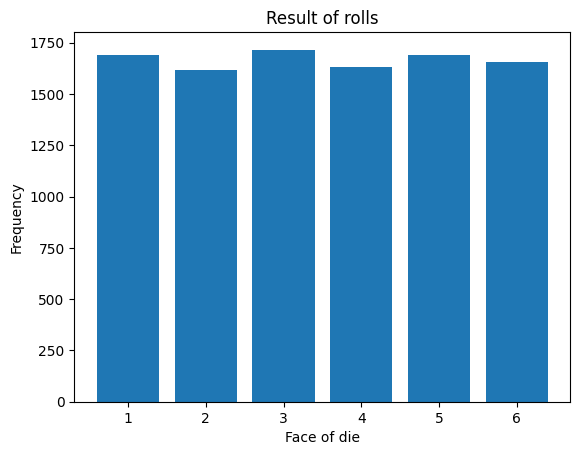

In [10]:
import matplotlib.pyplot as plt
import random

class Dice:
    """Models a fair six-sided dice"""
    def __init__(self):
        self.faces = (1, 2, 3, 4, 5, 6)
    
    def roll(self):
        """Return one random face value"""
        return random.choice(self.faces)
    
    def frequency(self):
        """Prints the frequency of each face value after rolling n times"""
        results = []
        freq = {}

        n = int(input("Enter how mnay times you want to roll the dice: "))

        for _ in range(n):
            results.append(self.roll())
        
        for r in results:
            if r in freq:
                freq[r] += 1
            else:
                freq[r] = 1
            
        return freq
    
    def histogram(self):
        """Illustrates a histogram of frequencies after rolling n times"""
        freq = self.frequency()
        faces = list(freq.keys())
        counts = list(freq.values())

        plt.bar(faces, counts)
        plt.xlabel('Face of die')
        plt.ylabel('Frequency')
        plt.title('Result of rolls')
        plt.show()

d = Dice()
d.roll()
print("\nFace: Frequency\n", d.frequency(), "\n")
d.histogram()

From the simulation, each face of a fair die appears with basically the same frequency over 10,000 rolls, and the histogram confirms that the die is uniformly distributed.

## Question 3

- P(D|T+) = (0.999 * 0.0001) / (0.999 * 0.0001 + 0.05 * 0.9999) = 0.001996... about 2%
- P(D|T1+, T2+) = (0.9998 * 0.0001) / (0.9998 * 0.0001 + 0.0025 * 0.9999) = 0.0385 ... 3.85%

Despite the sensitivity being high, the disease is very rare and the 5% false-positive rate will cause many people who don't have the disease to test positive, overwhelming the few real positives. This makes most of the positive test results, false-positives instead of true-positives.

In [11]:
def simulate(tries = 1000000):
    """Monte-Carlo simulation of testing for a 0.01% disease with 99.99% true positive and 5% false positive rate"""

    one_pos_count = 0
    one_pos_and_disease = 0
    two_pos_count = 0
    two_pos_and_disease = 0

    for _ in range(tries):
        d = random.random() < 0.0001

        t1 = random.random() < (0.9999 if d else 0.05)
        t2 = random.random() < (0.9999 if d else 0.05)

        if t1:
            one_pos_count += 1
            if d:
                one_pos_and_disease += 1

        if t1 and t2:
            two_pos_count += 1
            if d:
                two_pos_and_disease += 1

    return one_pos_and_disease / one_pos_count, two_pos_and_disease / two_pos_count

print(simulate())

(0.0018174918612315005, 0.03428786737000754)


## Question 4